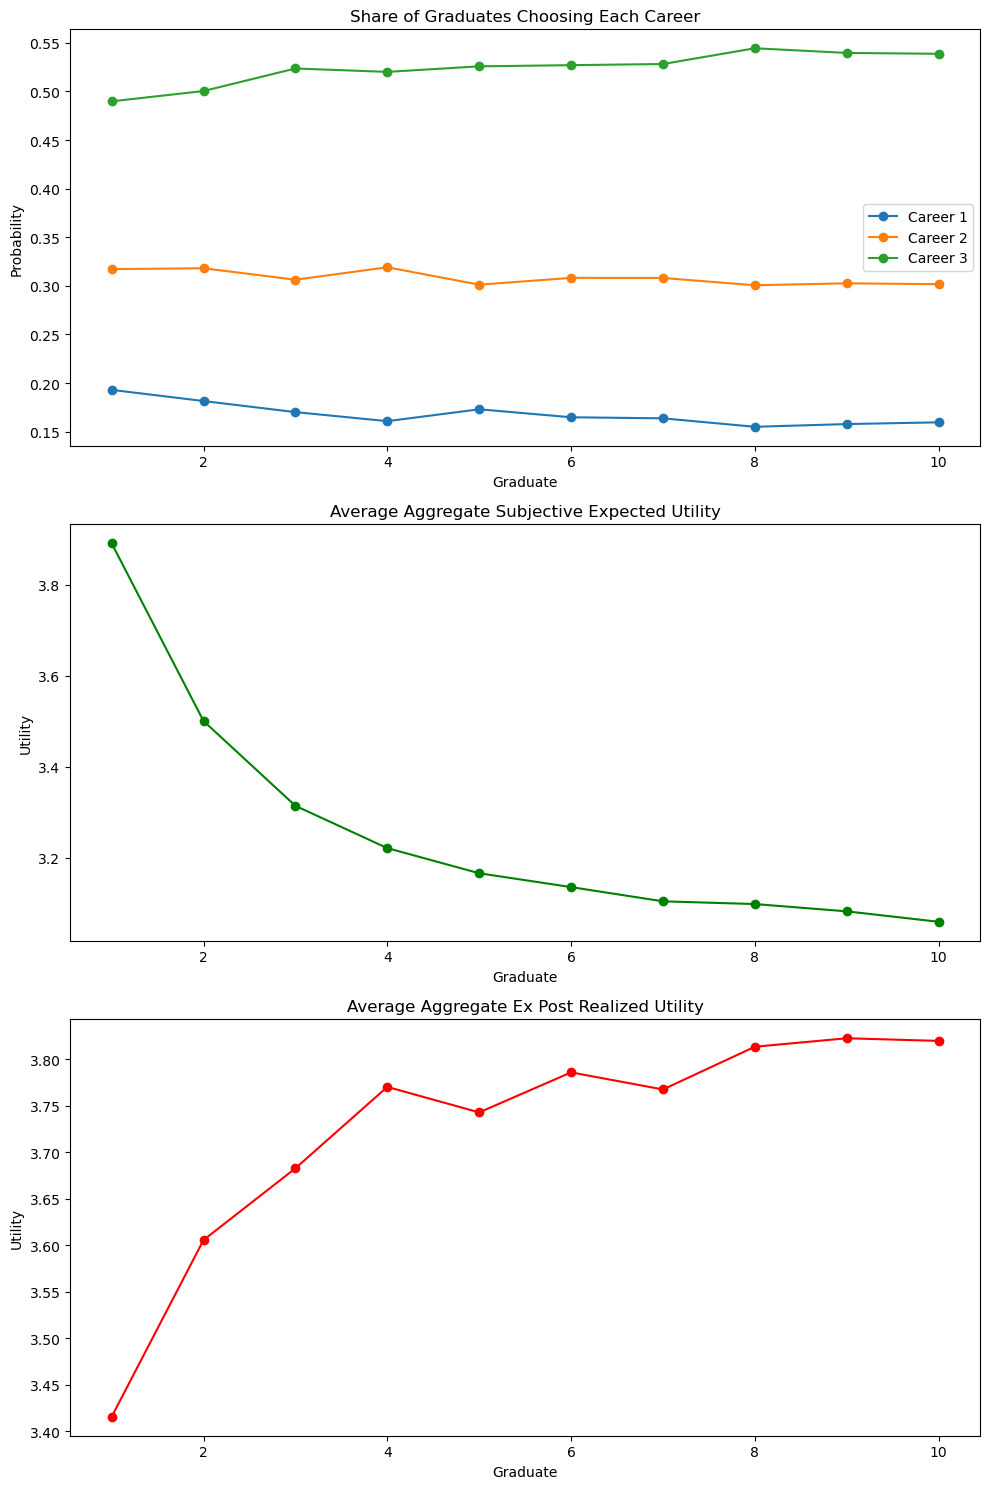

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of graduates
J = 3  # Number of career tracks
K = 10000  # Number of simulations
sigma = 2  # Standard deviation of the noise
v = np.array([1, 2, 3])  # Known part of the utility for each career

# Results storage
choice_probabilities = np.zeros((N, J))
avg_expected_utilities = np.zeros(N)
avg_realized_utilities = np.zeros(N)

# Simulation process
np.random.seed(0)  # For reproducibility
for i in range(1, N + 1):
    Fi = i  # Each graduate i has i friends in each career
    
    # Arrays to store utilities for each simulation
    all_expected_utilities = np.zeros(K)
    all_realized_utilities = np.zeros(K)
    choices = np.zeros((K, J))
    
    for k in range(K):
        # Draw friend and own noise for each career track
        friend_noise = np.random.normal(0, sigma, (Fi, J))
        own_noise = np.random.normal(0, sigma, J)
        
        # Calculate prior expected utility for each career
        prior_expected_utilities = v + np.mean(friend_noise, axis=0)
        
        # Calculate total utility including own noise
        total_utilities = prior_expected_utilities + own_noise
        
        # Determine the chosen career based on the max utility
        chosen_career = np.argmax(total_utilities)
        choices[k, chosen_career] = 1
        all_expected_utilities[k] = np.max(prior_expected_utilities)
        all_realized_utilities[k] = v[chosen_career] + own_noise[chosen_career]

    # Calculate and store results
    choice_probabilities[i - 1] = choices.mean(axis=0)
    avg_expected_utilities[i - 1] = all_expected_utilities.mean()
    avg_realized_utilities[i - 1] = all_realized_utilities.mean()

# Visualization of metrics
plt.figure(figsize=(10, 15))
graduates = np.arange(1, N + 1)

# Plotting choice probabilities for each career
plt.subplot(3, 1, 1)
for j in range(J):
    plt.plot(graduates, choice_probabilities[:, j], marker='o', linestyle='-', label=f'Career {j+1}')
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate')
plt.ylabel('Probability')
plt.legend()

# Plotting aggregated expected utilities
plt.subplot(3, 1, 2)
plt.plot(graduates, avg_expected_utilities, marker='o', linestyle='-', color='green')
plt.title('Average Aggregate Subjective Expected Utility')
plt.xlabel('Graduate')
plt.ylabel('Utility')

# Plotting aggregated realized utilities
plt.subplot(3, 1, 3)
plt.plot(graduates, avg_realized_utilities, marker='o', linestyle='-', color='red')
plt.title('Average Aggregate Ex Post Realized Utility')
plt.xlabel('Graduate')
plt.ylabel('Utility')

plt.tight_layout()
plt.show()




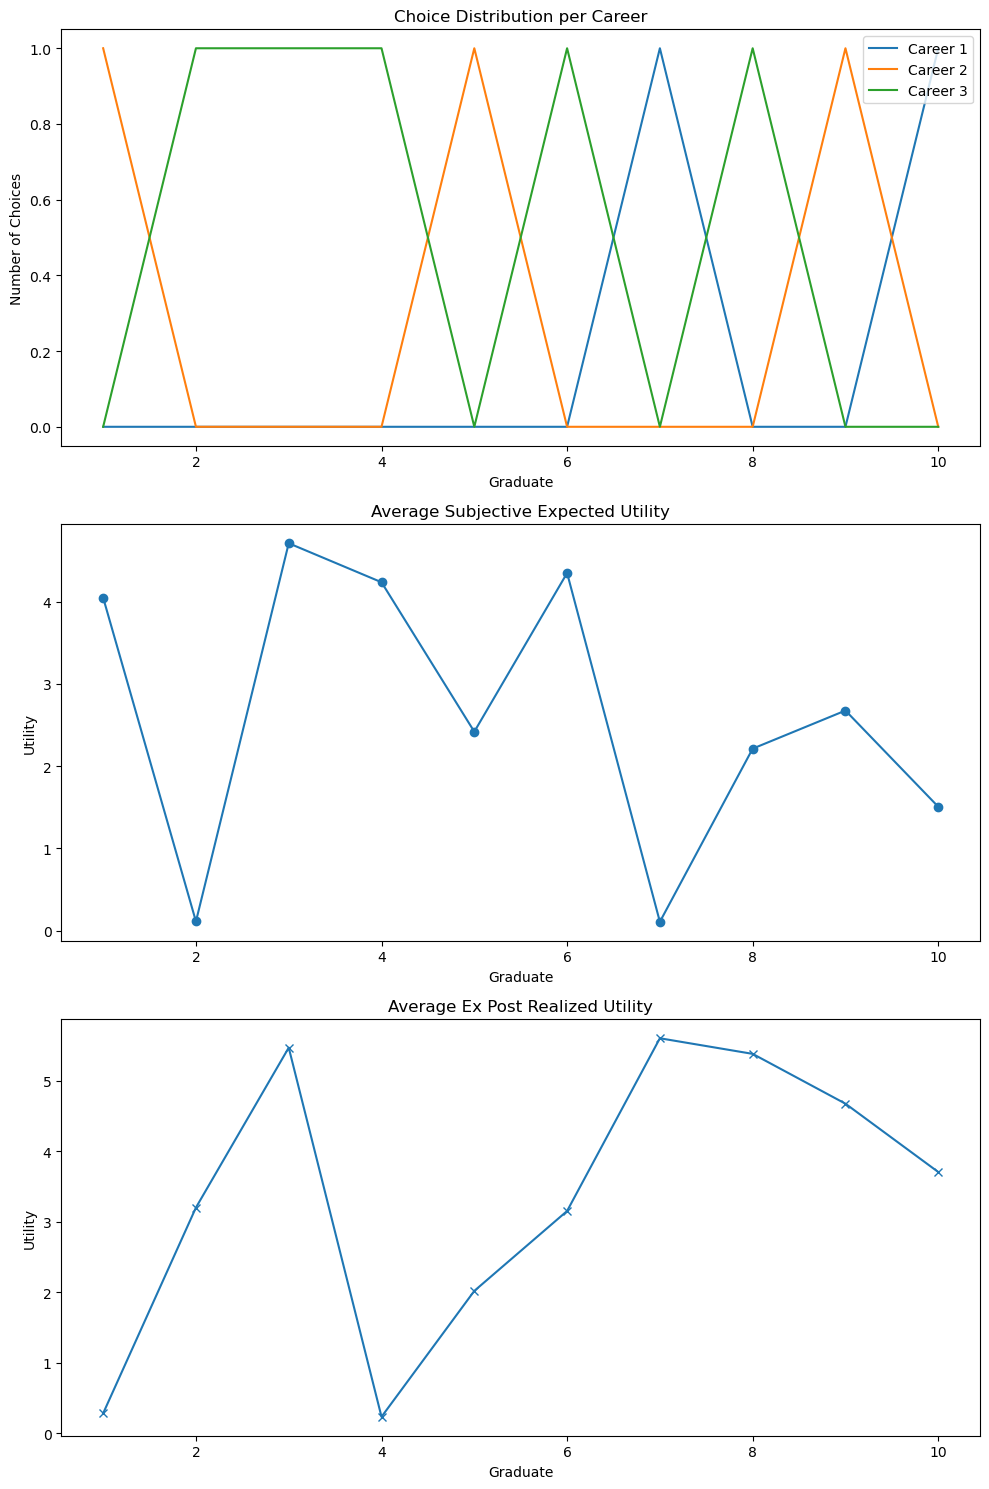

In [10]:
import matplotlib.pyplot as plt

N = 10  # Number of graduates
choices = np.zeros((N, J))
expected_utilities_graduates = np.zeros(N)
realized_utilities_graduates = np.zeros(N)

# Simulation for each graduate
for i in range(1, N+1):
    # Friends' utilities
    friends_utilities = v + np.random.normal(0, sigma, (i, J))
    # Expected utility based on friends' average
    expected_utility = np.mean(friends_utilities, axis=0)
    # Graduate's personal noise
    personal_noise = np.random.normal(0, sigma, J)
    # Total utility combining prior expectation and personal noise
    total_utility = expected_utility + personal_noise
    # Choose the career with the highest total utility
    chosen_career = np.argmax(total_utility)
    choices[i-1, chosen_career] += 1
    expected_utilities_graduates[i-1] = expected_utility[chosen_career]
    realized_utilities_graduates[i-1] = v[chosen_career] + personal_noise[chosen_career]

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for j in range(J):
    axs[0].plot(range(1, N+1), choices[:, j], label=f'Career {j+1}')
axs[0].set_title('Choice Distribution per Career')
axs[0].set_xlabel('Graduate')
axs[0].set_ylabel('Number of Choices')
axs[0].legend()

axs[1].plot(range(1, N+1), expected_utilities_graduates, marker='o')
axs[1].set_title('Average Subjective Expected Utility')
axs[1].set_xlabel('Graduate')
axs[1].set_ylabel('Utility')

axs[2].plot(range(1, N+1), realized_utilities_graduates, marker='x')
axs[2].set_title('Average Ex Post Realized Utility')
axs[2].set_xlabel('Graduate')
axs[2].set_ylabel('Utility')

plt.tight_layout()
plt.show()



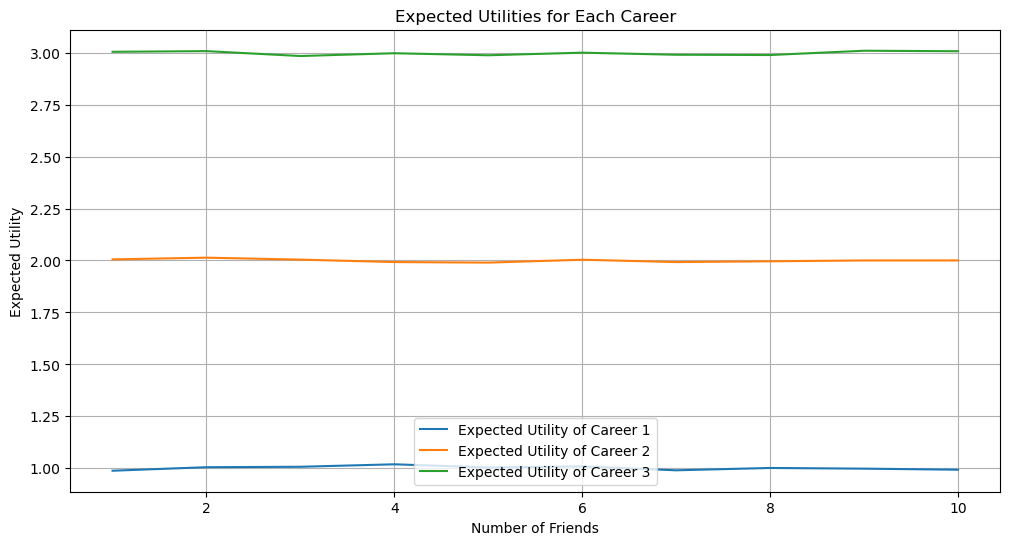

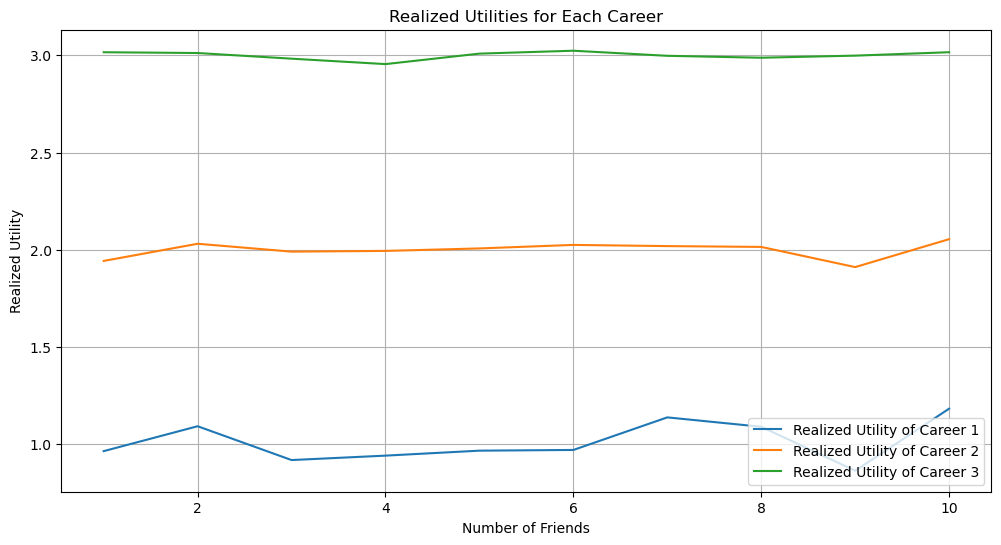

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Setting initial parameters
N = 10  # Number of graduates
J = 3   # Number of careers
K = 10000  # Number of simulations
v = np.array([1, 2, 3])  # Utilities of careers
sigma = 2  # Standard deviation of noise

# Results storage
choices = np.zeros((N, J))
expected_utilities = np.zeros((N, J))
realized_utilities = np.zeros((N, J))

# Simulation
np.random.seed(42)  # For reproducibility
for i in range(1, N+1):
    # Simulate friends' reported utilities and personal noise for each simulation
    friends_utilities = np.random.randn(K, i, J) * sigma + v
    personal_noise = np.random.randn(K, J) * sigma

    # Calculate prior expected utilities as the mean of friends' utilities
    prior_expected_utilities = np.mean(friends_utilities, axis=1)  # Averaging over friends
    # Calculate realized utilities with personal noise added to base utilities
    realized_utilities_values = v + personal_noise
    
    # Decide based on prior expected utilities
    chosen_careers = np.argmax(prior_expected_utilities, axis=1)
    
    # Aggregate results
    for j in range(J):
        choices[i-1, j] = np.mean(chosen_careers == j)
        expected_utilities[i-1, j] = np.mean(prior_expected_utilities[:, j])
        # Aggregate realized utilities for chosen careers only
        mask = (chosen_careers == j)
        realized_utilities[i-1, j] = np.mean(realized_utilities_values[mask, j])

# Visualization of expected utilities
plt.figure(figsize=(12, 6))
for j in range(J):
    plt.plot(range(1, N+1), expected_utilities[:, j], label=f'Expected Utility of Career {j+1}')
plt.title('Expected Utilities for Each Career')
plt.xlabel('Number of Friends')
plt.ylabel('Expected Utility')
plt.legend()
plt.grid(True)
plt.show()

# Visualization of realized utilities
plt.figure(figsize=(12, 6))
for j in range(J):
    plt.plot(range(1, N+1), realized_utilities[:, j], label=f'Realized Utility of Career {j+1}')
plt.title('Realized Utilities for Each Career')
plt.xlabel('Number of Friends')
plt.ylabel('Realized Utility')
plt.legend()
plt.grid(True)
plt.show()



Coordinates of points forming Triangle ABC: [0.26071605 0.43635845] [0.21315735 0.274245  ] [0.10056103 0.27951775]
Coordinates of points forming Triangle CDA: [0.10056103 0.27951775] [0.20634391 0.44272557] [0.26071605 0.43635845]
Point y is inside Triangle ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
Point y is not inside Triangle CDA.


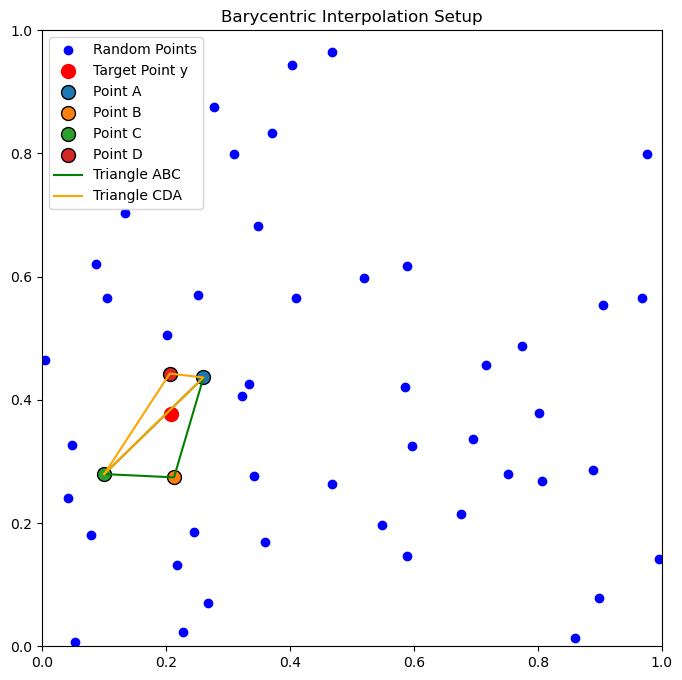

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from Examproject.Problem3 import Problem  # Ensure this matches the actual filename

model = Problem()

# Generate random points and a target point
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))  # 50 random points
y = rng.uniform(size=(2,))     # Target point

# Identify points A, B, C, and D based on specific conditions
points = {
    'A': model.find_closest_point(X, y, lambda pt, y: pt[0] > y[0] and pt[1] > y[1]),
    'B': model.find_closest_point(X, y, lambda pt, y: pt[0] > y[0] and pt[1] < y[1]),
    'C': model.find_closest_point(X, y, lambda pt, y: pt[0] < y[0] and pt[1] < y[1]),
    'D': model.find_closest_point(X, y, lambda pt, y: pt[0] < y[0] and pt[1] > y[1])
}

# Calculate barycentric coordinates
coords_abc = model.point_in_triangle(points['A'], points['B'], points['C'], y) if all(points.get(k) is not None for k in ['A', 'B', 'C']) else None
coords_cda = model.point_in_triangle(points['C'], points['D'], points['A'], y) if all(points.get(k) is not None for k in ['C', 'D', 'A']) else None

# Output point information
print("Coordinates of points forming Triangle ABC:", points['A'], points['B'], points['C'])
print("Coordinates of points forming Triangle CDA:", points['C'], points['D'], points['A'])

if coords_abc:
    print("Point y is inside Triangle ABC:", coords_abc)
else:
    print("Point y is not inside Triangle ABC.")

if coords_cda:
    print("Point y is inside Triangle CDA:", coords_cda)
else:
    print("Point y is not inside Triangle CDA.")

# Plotting setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Random Points')
ax.scatter(y[0], y[1], color='red', label='Target Point y', s=100)
for key, pt in points.items():
    if pt is not None:
        ax.scatter(pt[0], pt[1], label=f'Point {key}', s=100, edgecolors='black')

# Draw triangles if all points are available
if all(points.get(key) is not None for key in ['A', 'B', 'C']):
    model.draw_triangle(ax, points, ['A', 'B', 'C'], 'green', 'Triangle ABC')
if all(points.get(key) is not None for key in ['C', 'D', 'A']):
    model.draw_triangle(ax, points, ['C', 'D', 'A'], 'orange', 'Triangle CDA')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Barycentric Interpolation Setup")
ax.legend()
plt.show()


# Q.3

In [13]:
import numpy as np


# Instantiate the model
model = Problem()

# Generate random points and a target point
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))  # Generate random points
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])  # Calculate function values for X

y = rng.uniform(size=(2,))  # Target point

# Identify points A, B, C, and D based on specific conditions
indices = {
    'A': model.find_closest_point_index(X, y, lambda pt, y: pt[0] > y[0] and pt[1] > y[1]),
    'B': model.find_closest_point_index(X, y, lambda pt, y: pt[0] > y[0] and pt[1] < y[1]),
    'C': model.find_closest_point_index(X, y, lambda pt, y: pt[0] < y[0] and pt[1] < y[1]),
    'D': model.find_closest_point_index(X, y, lambda pt, y: pt[0] < y[0] and pt[1] > y[1])
}

if all(idx is not None for idx in indices.values()):
    points = {key: X[idx] for key, idx in indices.items()}
    values = {key: F[idx] for key, idx in indices.items()}

    coords_abc = model.point_in_triangle(points['A'], points['B'], points['C'], y)
    if coords_abc:
        f_approx = model.approximate_value(coords_abc, [values['A'], values['B'], values['C']])
        print(f"Approximated value at {y}: {f_approx} (Actual: {f(y)})")
    else:
        print("Point y is not inside the triangle ABC or coordinates couldn't be computed.")
else:
    print("Not all points (A, B, C, D) could be found.")



Approximated value at [0.20901926 0.37774759]: 0.08405201731052576 (Actual: 0.0789565216259594)


# Q.4

In [20]:
import numpy as np


# Instantiate the model
model = Problem()

def main():
    rng = np.random.default_rng(2024)
    X = rng.uniform(size=(50, 2))  # Generate random points
    f = lambda x: x[0] * x[1]
    F = np.array([f(x) for x in X])  # Calculate function values for X
    
    Y = np.array([
        [0.2, 0.2],
        [0.8, 0.2],
        [0.8, 0.8],
        [0.8, 0.2],
        [0.5, 0.5]
    ])
    
    # Calculate the nearest points A, B, C, D
    points = {
        'A': np.array([0.6, 0.7]),
        'B': np.array([0.6, 0.3]),
        'C': np.array([0.3, 0.3]),
        'D': np.array([0.3, 0.7])
    }
    
    for y in Y:
        coords_abc = model.barycentric_coordinates(points['A'], points['B'], points['C'], y)
        coords_cda = model.barycentric_coordinates(points['C'], points['D'], points['A'], y)
        
        f_actual = f(y)
        
        if coords_abc:
            f_approx_abc = model.approximate_value(coords_abc, [f(points['A']), f(points['B']), f(points['C'])])
            print(f"Approximation at {y} using triangle ABC: {f_approx_abc} (Actual: {f_actual})")
        if coords_cda:
            f_approx_cda = model.approximate_value(coords_cda, [f(points['C']), f(points['D']), f(points['A'])])
            print(f"Approximation at {y} using triangle CDA: {f_approx_cda} (Actual: {f_actual})")

if __name__ == "__main__":
    main()


AttributeError: 'Problem' object has no attribute 'barycentric_coordinates'